**Greedy approach with non-optimistic initial values:**
Here, the k-armed bandit algorithm is run with the estimates of action values initialized to 0. The reward distribution is a Normal distribution between 0 and 1. This is the simplest form of the algorithm.

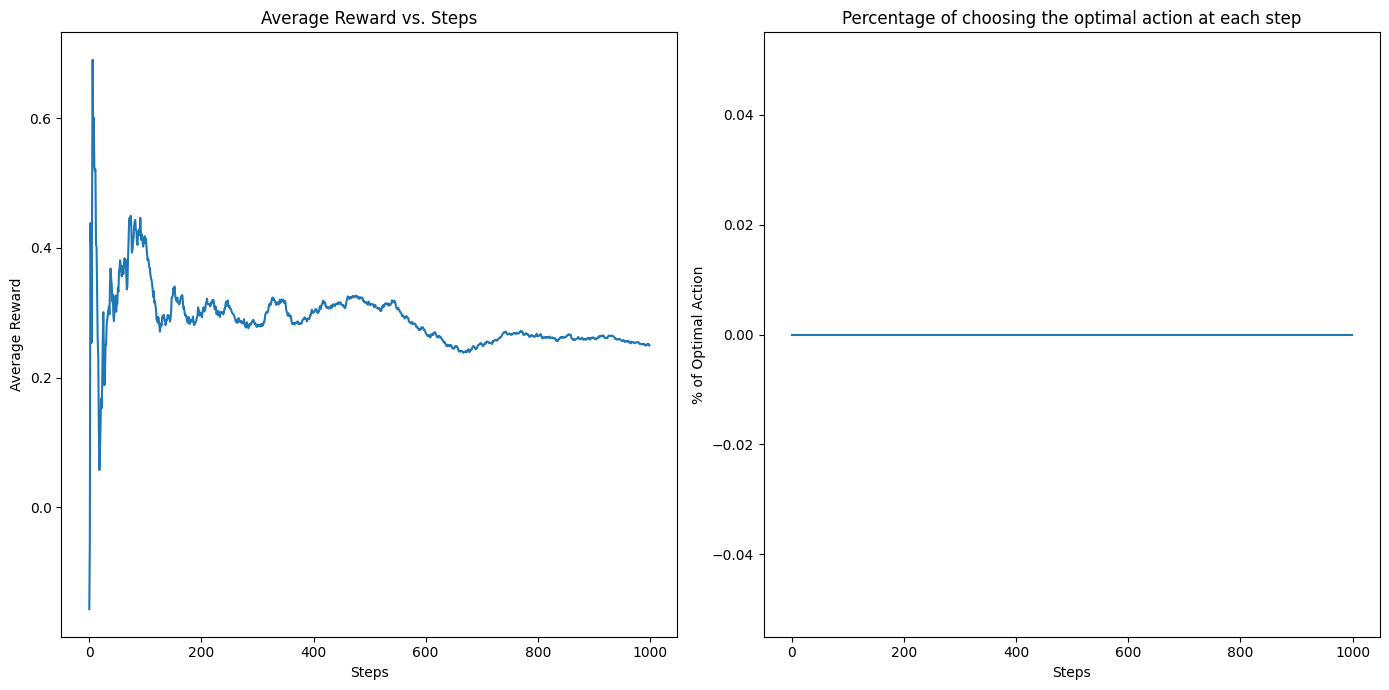

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(21)

class KArmedBandit:
    def __init__(self, k, true_means):
        self.k = k
        self.true_means = true_means  # True means of the reward distributions
        self.estimates = np.zeros(k)  # Estimated means of the rewards
        self.action_counts = np.zeros(k)  # Counts of how many times each action was taken

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1.0)

    def greedy_action(self):
        # Choose the action with the highest estimated reward
        return np.argmax(self.estimates)

    def update_estimates(self, action, reward):
        # Update the estimates with the new reward
        self.action_counts[action] += 1
        alpha = 1.0 / self.action_counts[action]
        self.estimates[action] += alpha * (reward - self.estimates[action])

    def run(self, steps):
        total_rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        optimal_action = np.argmax(self.true_means)

        for step in range(steps):
            action = self.greedy_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            total_rewards[step] = reward
            if action == optimal_action:
                optimal_action_counts[step] = 1

        return total_rewards, optimal_action_counts

# Generate the normal reward distribution for k=10
k = 10
true_means = np.random.uniform(0, 1, k)  # True means between 0 and 1
bandit = KArmedBandit(k, true_means)

# Run the greedy algorithm 1000 times
steps = 1000
total_rewards, optimal_action_counts = bandit.run(steps)

# Calculate the average reward at each time step
average_rewards = np.cumsum(total_rewards) / (np.arange(steps) + 1)

# Calculate the percentage of time the algorithm took the optimal action at each time step
optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(steps) + 1)

# Plot the average reward at each time step
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(average_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps')

# Plot the percentage of choosing optimal action at each time step
plt.subplot(1, 2, 2)
plt.plot(optimal_action_percentage*100)
plt.xlabel('Steps')
plt.ylabel('% of Optimal Action')
plt.title('Percentage of choosing the optimal action at each step')

plt.tight_layout()
plt.show()

**Greedy approach with optimistic initial values:**
Here, the greedy k-armed bandit algorithm is run with optimistic starting values. We run the algorithm for 1000 steps each for a different starting value and then compare the plots of their average reward and percentage of choosing the optimal action for each initial value.

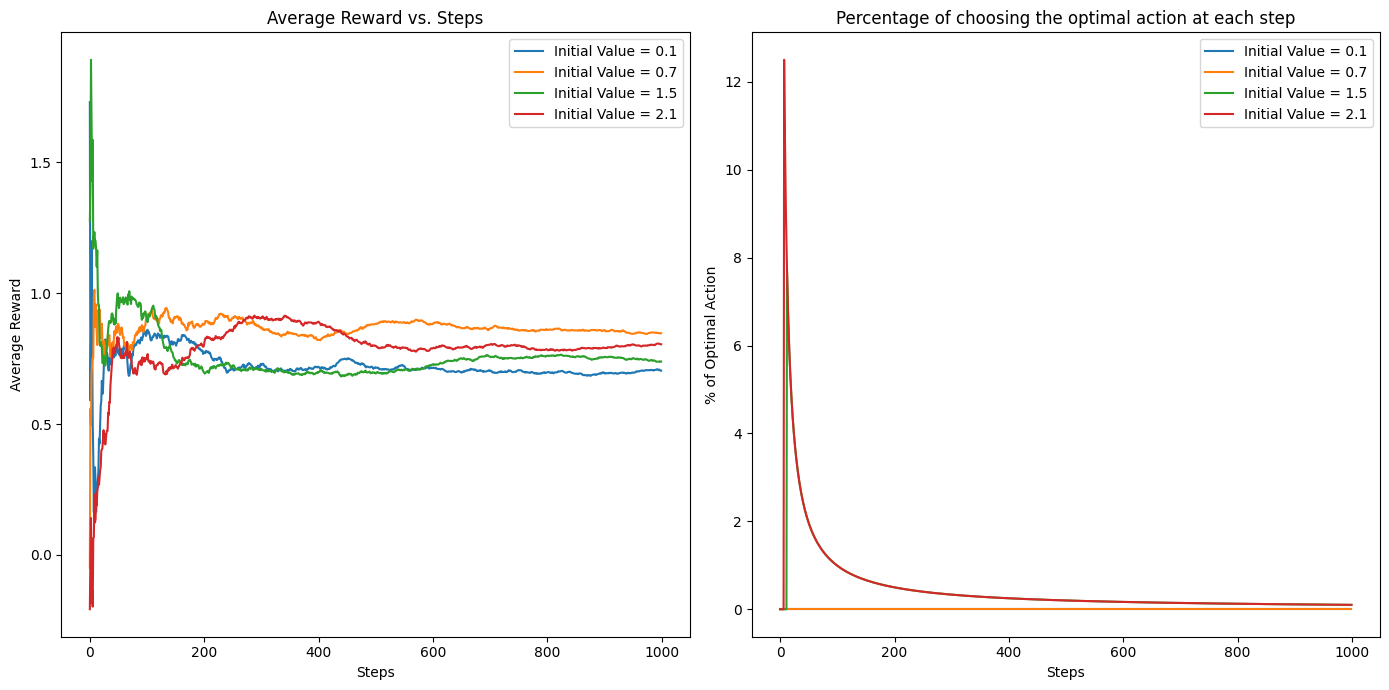

In [ ]:
class KArmedBandit:
    def __init__(self, k, true_means, initial_value=0):
        self.k = k
        self.true_means = true_means  # True means of the reward distributions
        self.estimates = np.full(k, initial_value)  # Estimated means of the rewards
        self.action_counts = np.zeros(k)  # Counts of how many times each action was taken

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1.0)

    def greedy_action(self):
        # Choose the action with the highest estimated reward
        return np.argmax(self.estimates)

    def update_estimates(self, action, reward):
        # Update the estimates with the new reward
        self.action_counts[action] += 1
        alpha = 1.0 / self.action_counts[action]
        self.estimates[action] += alpha * (reward - self.estimates[action])

    def run(self, steps):
        total_rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        optimal_action = np.argmax(self.true_means)

        for step in range(steps):
            action = self.greedy_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            total_rewards[step] = reward
            if action == optimal_action:
                optimal_action_counts[step] = 1

        return total_rewards, optimal_action_counts

# Generate the normal reward distribution for k=10
k = 10
true_means = np.random.uniform(0, 1, k)  # True means between 0 and 1

# Define initial values for the action value estimates
initial_values = [0.1, 0.7, 1.5, 2.1]

# Run the greedy algorithm 1000 times for each initial value and collect data
steps = 1000
results = {}

for initial_value in initial_values:
    bandit = KArmedBandit(k, true_means, initial_value)
    total_rewards, optimal_action_counts = bandit.run(steps)

    average_rewards = np.cumsum(total_rewards) / (np.arange(steps) + 1)
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(steps) + 1)

    results[initial_value] = (average_rewards, optimal_action_percentage)

# Plot the average reward at each time step
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for initial_value in initial_values:
    plt.plot(results[initial_value][0], label=f'Initial Value = {initial_value}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps')
plt.legend()

# Plot the percentage of choosing optimal action at each time step
plt.subplot(1, 2, 2)
for initial_value in initial_values:
    plt.plot(results[initial_value][1]*100, label=f'Initial Value = {initial_value}')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Action')
plt.title('Percentage of choosing the optimal action at each step')
plt.legend()

plt.tight_layout()
plt.show()


**Epsilon-Greedy approach:**
The key difference here from the previous implementations is the addition of the epsilon variable which allows some degree of exploration. Several pilot runs were conducted for different values of epsilon and then the plots for each were compared.

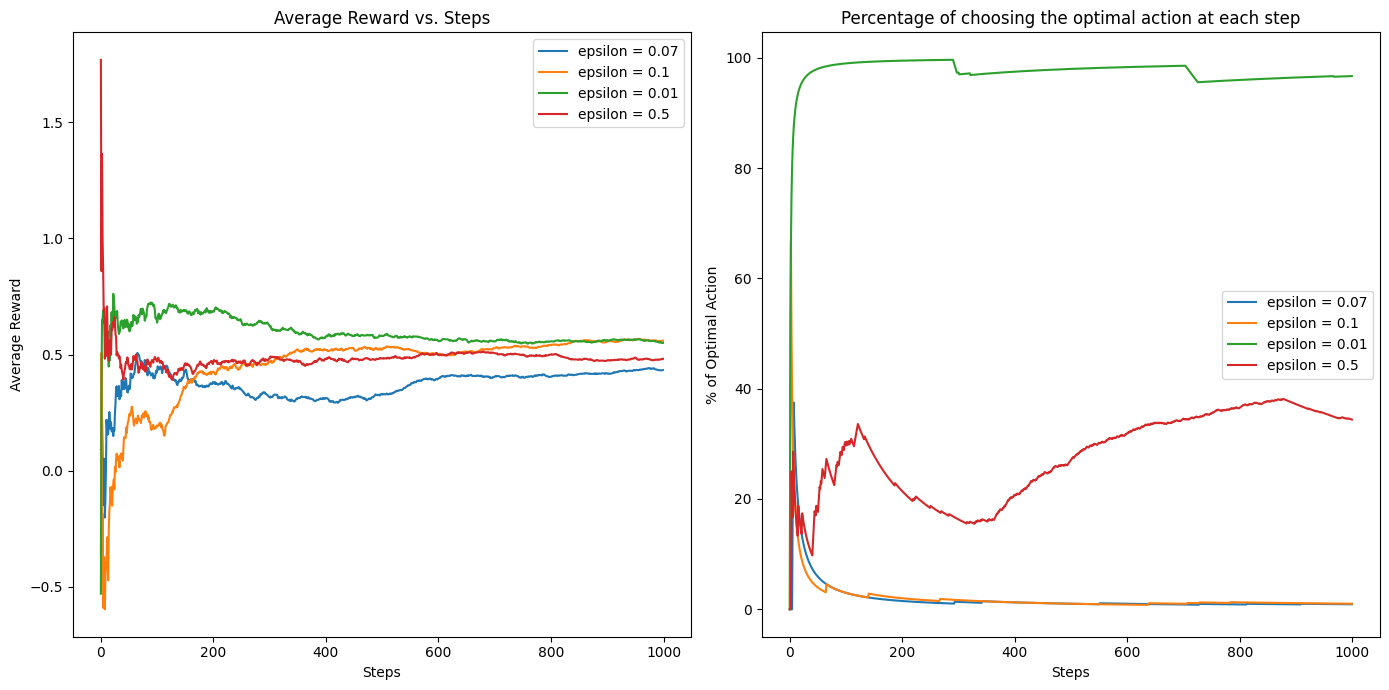

In [ ]:
class KArmedBanditEpsilonGreedy:
    def __init__(self, k, true_means):
        self.k = k
        self.true_means = true_means  # True means of the reward distributions
        self.estimates = np.zeros(k)  # Initial estimates of the rewards
        self.action_counts = np.zeros(k)  # Counts of how many times each action was taken

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1.0)

    def epsilon_greedy_action(self, epsilon):
        if np.random.random() < epsilon:
            # Exploration: choose a random action
            return np.random.choice(self.k)
        else:
            # Exploitation: choose the best-known action
            return np.argmax(self.estimates)

    def update_estimates(self, action, reward):
        # Update the estimates with the new reward
        self.action_counts[action] += 1
        alpha = 1.0 / self.action_counts[action]
        self.estimates[action] += alpha * (reward - self.estimates[action])

    def run(self, steps, epsilon):
        total_rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        optimal_action = np.argmax(self.true_means)

        for step in range(steps):
            action = self.epsilon_greedy_action(epsilon)
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            total_rewards[step] = reward
            if action == optimal_action:
                optimal_action_counts[step] = 1

        return total_rewards, optimal_action_counts

# Generate the normal reward distribution for k=10
k = 10
true_means = np.random.uniform(0, 1, k)  # True means between 0 and 1

# Define different epsilon values
epsilons = [0.07, 0.1, 0.01, 0.5]

# Run the epsilon-greedy algorithm for each epsilon value
steps = 1000
results = {}

for epsilon in epsilons:
    bandit = KArmedBanditEpsilonGreedy(k, true_means)
    total_rewards, optimal_action_counts = bandit.run(steps, epsilon)

    average_rewards = np.cumsum(total_rewards) / (np.arange(steps) + 1)
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(steps) + 1)

    results[epsilon] = (average_rewards, optimal_action_percentage)

# Plot the average reward at each time step
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f'epsilon = {epsilon}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps')
plt.legend()

# Plot the percentage of choosing optimal action at each time step
plt.subplot(1, 2, 2)
for epsilon in epsilons:
    plt.plot(results[epsilon][1]*100, label=f'epsilon = {epsilon}')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Action')
plt.title('Percentage of choosing the optimal action at each step')
plt.legend()

plt.tight_layout()
plt.show()


**Gradient Bandit algorithm:**
In this implementation, we tweak the learning rate, alpha, of the algorithm and conduct pilot runs for different values of the learning rate.

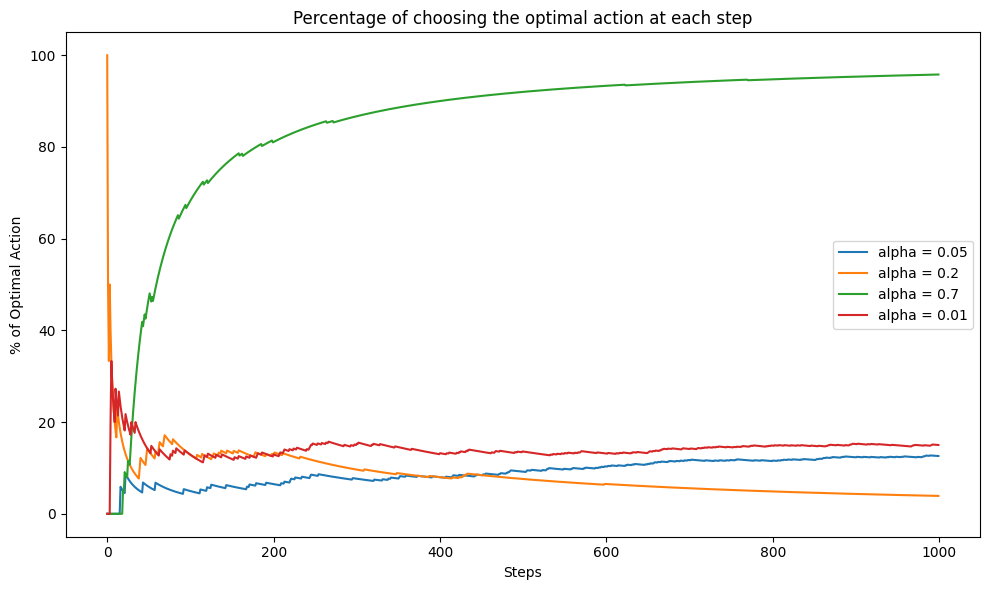

In [ ]:
class GradientBandit:
    def __init__(self, k, true_means, alpha):
        self.k = k
        self.true_means = true_means  # True means of the reward distributions
        self.preferences = np.zeros(k)
        self.action_probs = np.ones(k) / k
        self.alpha = alpha  # Step size parameter/ learning rate
        self.average_reward = 0
        self.time_step = 0

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1.0)

    def select_action(self):
        # Select an action based on the current action probabilities
        return np.random.choice(self.k, p=self.action_probs)

    def update_preferences(self, action, reward):
        # Update the preferences and action probabilities
        self.time_step += 1
        self.average_reward += (reward - self.average_reward) / self.time_step  # Update average reward

        baseline = self.average_reward
        one_hot = np.zeros(self.k)
        one_hot[action] = 1

        self.preferences += self.alpha * (reward - baseline) * (one_hot - self.action_probs)
        self.action_probs = np.exp(self.preferences) / np.sum(np.exp(self.preferences))

    def run(self, steps):
        optimal_action = np.argmax(self.true_means)
        optimal_action_counts = np.zeros(steps)

        for step in range(steps):
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_preferences(action, reward)
            if action == optimal_action:
                optimal_action_counts[step] = 1

        return optimal_action_counts

# Generate the normal reward distribution for k=10
k = 10
true_means = np.random.uniform(0, 1, k)  # True means between 0 and 1

# Define different alpha values
alphas = [0.05, 0.2, 0.7, 0.01]

# Run the gradient bandit algorithm for each value of alpha
steps = 1000
results = {}

for alpha in alphas:
    bandit = GradientBandit(k, true_means, alpha)
    optimal_action_counts = bandit.run(steps)
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(steps) + 1)
    results[alpha] = optimal_action_percentage

# Plot the percentage of choosing optimal action at each time step
plt.figure(figsize=(10, 6))

for alpha in alphas:
    plt.plot(results[alpha]*100, label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Action')
plt.title('Percentage of choosing the optimal action at each step')
plt.legend()

plt.tight_layout()
plt.show()


**Parameter Tuning:**
In the Greedy strategies, we tried different starting values as that's the only parameter that can be tuned. Different initial values would introduce more exploration because a higher value would mean that the actions chosen during the earlier iterations would likely have reward estimates lower than it, forcing the algorithm to explore more.

In the Epsilon-Greedy and Gradient Bandit algorithms, we tuned the parameters Epsilon and Alpha respectively. Epsilon is the probability of randomly picking an action instead of the best one, so increasing its value would allow more exploration. Alpha, on the other hand, is the learning rate. The learning rate controls how fast the algorithm converges on the optimal action. Increasing its value by a certain amount will lead to better performance, but too high of a value will likely cause the algorithm to skip over the actual optimal action.


**Evaluation:**
From the plots, we observe that the greedy approaches fail to find the optimal action most of the time. The Epsilon-Greedy strategy does a lot better, but the best one in terms of choosing the optimal action is the Gradient Bandit algorithm. The Epsilon-Greedy algorithm reaches its peak performance when Epsilon=0.01, and the Gradient Bandit algorithm reaches its peak when Alpha=0.7.